<a href="https://colab.research.google.com/github/SachiSachu/Nitg/blob/main/projectwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math


Edge devices Consideration

In [13]:
edges = 2
#edges = int(input('number of edge devices: '))

Number of IoT devices

In [14]:
iot = 6
#iot = int(input("number of IOT devices: "))

Positions of Edge devices



array([[32, 14],
       [43, 17]])


In [15]:
edgeco = [[32, 14],
       [43, 17]]
"""for i in range(edges):
  ar1 = []
  x = random.randint(0,100)
  ar1.append(x)
  y = random.randint(0,100)
  ar1.append(y)
  edgeco.append(ar1)"""
np.array(edgeco)

array([[32, 14],
       [43, 17]])

Position of IoT devices



iotco = [[22, 34],
       [20, 30],
       [ 43, 39],
       [35, 40],
       [45, 39],
       [55, 38]]

In [16]:
iotco = [[22, 34],
       [20, 30],
       [ 43, 39],
       [35, 40],
       [45, 39],
       [22, 37]]
"""for i in range(iot):
  ar1 = []
  x = random.randint(0,100)
  ar1.append(x)
  y = random.randint(0,100)
  ar1.append(y)
  iotco.append(ar1)"""
np.array(iotco)

array([[22, 34],
       [20, 30],
       [43, 39],
       [35, 40],
       [45, 39],
       [22, 37]])

Euclidean distance between edge device and IoT device
d^2 = summation(xi - yi) where i= 1,2,3.......n


In [17]:
dist = []
for i in range(iot):
  ar1 = []
  for j in range(edges):
    x1 = (iotco[i][0]-edgeco[j][0])**2 + (iotco[i][1]-edgeco[j][1])**2
    ar1.append(int(math.sqrt(x1)))
  dist.append(ar1)
np.array(dist)

array([[22, 27],
       [20, 26],
       [27, 22],
       [26, 24],
       [28, 22],
       [25, 29]])

Connection Matrix which defines the connection between edge and IoT devices


In [18]:
lim = 25
conn = []
for i in range(iot):
  ar1 = []
  for j in range(edges):
    if dist[i][j] <=lim:
      ar1.append(1)
    else:
      ar1.append(0)
  conn.append(ar1)
np.array(conn)

array([[1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0]])

In [19]:
copyconn = [[1, 0],[1, 0],[1, 1],[0, 1],[0, 1],[1, 0]]
copyconn1 = [[1, 0],[1, 0],[1, 1],[0, 1],[0, 1],[1, 0]]

In [20]:
edge_iot1 = []
edge_iot2 = []
nonconn = []
for i in range(iot):
  for j in range(edges):
    if copyconn[i][j] == 1:
      if j==0:
        edge_iot1.append(i+1)
      elif j==1:
        edge_iot2.append(i+1)
      else:
        nonconn.append(i+1)
print("edge 1 connected to ",edge_iot1)
print("edge 2 connected to ",edge_iot2)   

edge 1 connected to  [1, 2, 3, 6]
edge 2 connected to  [3, 4, 5]


[link text](https://)Load of edge devices 
& 
Load of IoT devices

In [21]:
loadedge = [500,500]
loadiot = [110, 50, 40, 100, 80, 40]

without Load balancing 

load on edge1  240
load on edge2  180


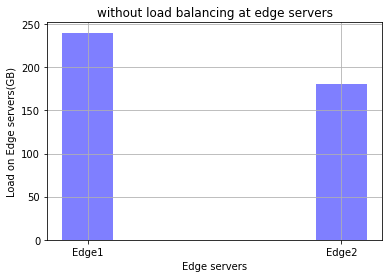

In [22]:
sum1 = 0
sum2 = 0
duplicate = []
for i in edge_iot1:
  if i not in edge_iot2:
    sum1 += loadiot[i-1]
  else:
    if i not in duplicate:
      duplicate.append(i)
for j in edge_iot2:
  if j not in edge_iot1:
    sum2 += loadiot[j-1]
  else:
    if j not in duplicate:
      duplicate.append(j)
lst = [sum1, sum2]
chse = random.choices(lst,k=1)
for i in chse:
  k = i
for val in duplicate:
  if k == sum1:
    sum1 += loadiot[val-1]
    copyconn[val-1][1] = 0
  elif k == sum2:
    sum2 += loadiot[val-1]
    copyconn[val-1][0] = 0
print("load on edge1 ",sum1)
print("load on edge2 ",sum2)
dict1 = {'Edge1': sum1,
         'Edge2': sum2}
x = dict1.keys()
y = dict1.values()
plt.grid()
plt.xlabel("Edge servers")
plt.ylabel("Load on Edge servers(GB)")
plt.title("without load balancing at edge servers")
plt.bar(x,y, color='blue', width=0.2, alpha=0.5)
plt.show()

With Load balancing

Load on edge1 server :  200
Load on edge2 server :  220


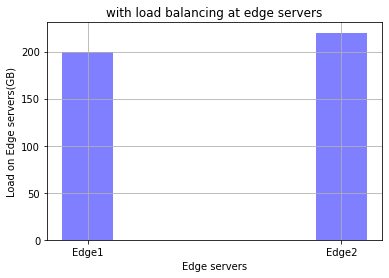

In [24]:
sum1 = 0
sum2 = 0
duplicate = []
for i in edge_iot1:
  if i not in edge_iot2:
    sum1 += loadiot[i-1]
  else:
    if i not in duplicate:
      duplicate.append(i)
for j in edge_iot2:
  if j not in edge_iot1:
    sum2 += loadiot[j-1]
  else:
    if j not in duplicate:
      duplicate.append(j)
"""print("connection before loading: \n",copyconn1)
print("Load on edge1 server : ",sum1)
print("Load on edge2 server : ",sum2)"""
for val in duplicate:
  if sum1 > sum2: 
    if (sum2+loadiot[val-1])<500:
        sum2 += loadiot[val-1]
        copyconn1[val-1][0] = 0
    else:                       # sum2 > sum1:
      if (sum1+loadiot[val-1])<500:
        sum1 += loadiot[val-1]
        copyconn1[val-1][1] = 0
print("Load on edge1 server : ",sum1)
print("Load on edge2 server : ",sum2)

dict1 = {'Edge1': sum1,
         'Edge2': sum2}
x = dict1.keys()
y = dict1.values()
plt.grid()
plt.xlabel("Edge servers")
plt.ylabel("Load on Edge servers(GB)")
plt.title("with load balancing at edge servers")
plt.bar(x,y, color='blue', width=0.2, alpha=0.5)
plt.show()